In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("D:/Python/Machine Learning/Research/SuccessFade.csv")

In [3]:
pd.set_option('display.max_columns', None)
display(df)
df.info() # returns range, column, number of non-null objects of each column
df.count() # returns number of non-null values in each column

,Datapoint Number,Test Time (s),Cycle Number,Current (A),Potential (V),Step Index,Step Time (s),Charge Capacity (Ah),Discharge Capacity (Ah),Charge Energy (Wh),Discharge Energy (Wh),Timestamp,dV/dt (V/s),dQ/dV (Ah/V),Current Cycle Net Capacity (Ah),Current Cycle Net Energy (Wh),Test Net Capacity (Ah),Test Net Energy (Wh),Test Cumulative Capacity (Ah),Test Cumulative Energy (Wh),Power (W),[Arbin] Datapoint Number,[Arbin] Test Time (s),[Arbin] Step Time (s),[Arbin] Date Time (excel format),[Arbin] Step Index,[Arbin] Cycle Number,[Arbin] Is Fast Capture,[Arbin] Current (A),[Arbin] Potential (V),[Arbin] Charge Capacity (Ah),[Arbin] Discharge Capacity (Ah),[Arbin] Charge Energy (Wh),[Arbin] Discharge Energy (Wh),[Arbin] dV/dT (V/s),[Arbin] Internal Resistance (Ω),[Arbin] AC Impedance (Ω),[Arbin] AC Impedance Phase Angle (°),Auxiliary Potential (V) 0 (V)
0,1,6.005024e+01,1,0.0,1.521578,1,59.955071,0.0,0.0,0.0,0.0,1.532430e+12,NaN,NaN,0.0,0.0,0.000000,0.000000,0.00000,0.00000,0.0,1,6.005024e+01,59.955071,43305.25157,1,1,False,0.0,1.521578,0.0,0.0,0.0,0.0,0.000000,0,0,0,0.025343
1,2,1.200510e+02,1,0.0,1.521578,1,119.955795,0.0,0.0,0.0,0.0,1.532430e+12,0.000000,NaN,0.0,0.0,0.000000,0.000000,0.00000,0.00000,0.0,2,1.200510e+02,119.955795,43305.25227,1,1,False,0.0,1.521578,0.0,0.0,0.0,0.0,0.000000,0,0,0,0.025653
2,3,1.801129e+02,1,0.0,1.521578,1,180.017705,0.0,0.0,0.0,0.0,1.532430e+12,0.000000,NaN,0.0,0.0,0.000000,0.000000,0.00000,0.00000,0.0,3,1.801129e+02,180.017705,43305.25297,1,1,False,0.0,1.521578,0.0,0.0,0.0,0.0,0.000000,0,0,0,0.025343
3,4,2.401611e+02,1,0.0,1.521883,1,240.065949,0.0,0.0,0.0,0.0,1.532430e+12,0.000005,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.00000,0.0,4,2.401611e+02,240.065949,43305.25367,1,1,False,0.0,1.521883,0.0,0.0,0.0,0.0,0.000000,0,0,0,0.025343
4,5,3.001781e+02,1,0.0,1.521578,1,300.082906,0.0,0.0,0.0,0.0,1.532430e+12,-0.000005,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.00000,0.0,5,3.001781e+02,300.082906,43305.25436,1,1,False,0.0,1.521578,0.0,0.0,0.0,0.0,0.000000,0,0,0,0.025343
5,6,3.602263e+02,1,0.0,1.521883,1,360.131131,0.0,0.0,0.0,0.0,1.532430e+12,0.000005,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.00000,0.0,6,3.602263e+02,360.131131,43305.25506,1,1,False,0.0,1.521883,0.0,0.0,0.0,0.0,0.000060,0,0,0,0.025343
6,7,4.202277e+02,1,0.0,1.521578,1,420.132525,0.0,0.0,0.0,0.0,1.532430e+12,-0.000005,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.00000,0.0,7,4.202277e+02,420.132525,43305.25575,1,1,False,0.0,1.521578,0.0,0.0,0.0,0.0,-0.000060,0,0,0,0.025343
7,8,4.802447e+02,1,0.0,1.521883,1,480.149553,0.0,0.0,0.0,0.0,1.532430e+12,0.000005,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.00000,0.0,8,4.802447e+02,480.149553,43305.25645,1,1,False,0.0,1.521883,0.0,0.0,0.0,0.0,0.000060,0,0,0,0.025343
8,9,5.402774e+02,1,0.0,1.521883,1,540.182181,0.0,0.0,0.0,0.0,1.532430e+12,0.000000,NaN,0.0,0.0,0.000000,0.000000,0.00000,0.00000,0.0,9,5.402774e+02,540.182181,43305.25714,1,1,False,0.0,1.521883,0.0,0.0,0.0,0.0,0.000060,0,0,0,0.025343
9,10,6.002943e+02,1,0.0,1.521578,1,600.199104,0.0,0.0,0.0,0.0,1.532430e+12,-0.000005,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.00000,0.0,10,6.002943e+02,600.199104,43305.25784,1,1,False,0.0,1.521578,0.0,0.0,0.0,0.0,-0.000061,0,0,0,0.025653


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632018 entries, 0 to 632017
Data columns (total 39 columns):
Datapoint Number                        632018 non-null int64
Test Time (s)                           632018 non-null float64
Cycle Number                            632018 non-null int64
Current (A)                             632018 non-null float64
Potential (V)                           632018 non-null float64
Step Index                              632018 non-null int64
Step Time (s)                           632018 non-null float64
Charge Capacity (Ah)                    632018 non-null float64
Discharge Capacity (Ah)                 632018 non-null float64
Charge Energy (Wh)                      632018 non-null float64
Discharge Energy (Wh)                   632018 non-null float64
Timestamp                               632018 non-null float64
dV/dt (V/s)                             632015 non-null float64
dQ/dV (Ah/V)                            448890 non-null float64

Datapoint Number                        632018
Test Time (s)                           632018
Cycle Number                            632018
Current (A)                             632018
Potential (V)                           632018
Step Index                              632018
Step Time (s)                           632018
Charge Capacity (Ah)                    632018
Discharge Capacity (Ah)                 632018
Charge Energy (Wh)                      632018
Discharge Energy (Wh)                   632018
Timestamp                               632018
dV/dt (V/s)                             632015
dQ/dV (Ah/V)                            448890
Current Cycle Net Capacity (Ah)         632018
Current Cycle Net Energy (Wh)           632018
Test Net Capacity (Ah)                  632018
Test Net Energy (Wh)                    632018
Test Cumulative Capacity (Ah)           632018
Test Cumulative Energy (Wh)             632018
Power (W)                               632018
[Arbin] Datap

In [4]:
columns = list(df.columns.values)
print(columns)

['Datapoint Number', 'Test Time (s)', 'Cycle Number', 'Current (A)', 'Potential (V)', 'Step Index', 'Step Time (s)', 'Charge Capacity (Ah)', 'Discharge Capacity (Ah)', 'Charge Energy (Wh)', 'Discharge Energy (Wh)', 'Timestamp', 'dV/dt (V/s)', 'dQ/dV (Ah/V)', 'Current Cycle Net Capacity (Ah)', 'Current Cycle Net Energy (Wh)', 'Test Net Capacity (Ah)', 'Test Net Energy (Wh)', 'Test Cumulative Capacity (Ah)', 'Test Cumulative Energy (Wh)', 'Power (W)', '[Arbin] Datapoint Number', '[Arbin] Test Time (s)', '[Arbin] Step Time (s)', '[Arbin] Date Time (excel format)', '[Arbin] Step Index', '[Arbin] Cycle Number', '[Arbin] Is Fast Capture', '[Arbin] Current (A)', '[Arbin] Potential (V)', '[Arbin] Charge Capacity (Ah)', '[Arbin] Discharge Capacity (Ah)', '[Arbin] Charge Energy (Wh)', '[Arbin] Discharge Energy (Wh)', '[Arbin] dV/dT (V/s)', '[Arbin] Internal Resistance (Ω)', '[Arbin] AC Impedance (Ω)', '[Arbin] AC Impedance Phase Angle (°)', 'Auxiliary Potential (V) 0 (V)']


In [5]:
imputer = SimpleImputer(missing_values = np.nan, strategy = "constant", fill_value = 0)
imputed_df = imputer.fit_transform(df.iloc[:, :])
imputed_df = pd.DataFrame(imputed_df, columns = df.columns)
# imputed_df['[Arbin] Is Fast Capture'] = imputed_df['[Arbin] Is Fast Capture'].astype(int)
imputed_df = imputed_df.drop(columns=['Datapoint Number', 'Test Time (s)', 'Step Index', 'Step Time (s)', '[Arbin] Test Time (s)', '[Arbin] Step Time (s)', '[Arbin] Date Time (excel format)', '[Arbin] Step Index', '[Arbin] Is Fast Capture','Timestamp', '[Arbin] Datapoint Number']) # not useful features
imputed_df = imputed_df.loc[(imputed_df != 0).any(axis=1)]
display(imputed_df)

imputed_df = imputed_df.convert_objects(convert_numeric = True)

,Cycle Number,Current (A),Potential (V),Charge Capacity (Ah),Discharge Capacity (Ah),Charge Energy (Wh),Discharge Energy (Wh),dV/dt (V/s),dQ/dV (Ah/V),Current Cycle Net Capacity (Ah),Current Cycle Net Energy (Wh),Test Net Capacity (Ah),Test Net Energy (Wh),Test Cumulative Capacity (Ah),Test Cumulative Energy (Wh),Power (W),[Arbin] Cycle Number,[Arbin] Current (A),[Arbin] Potential (V),[Arbin] Charge Capacity (Ah),[Arbin] Discharge Capacity (Ah),[Arbin] Charge Energy (Wh),[Arbin] Discharge Energy (Wh),[Arbin] dV/dT (V/s),[Arbin] Internal Resistance (Ω),[Arbin] AC Impedance (Ω),[Arbin] AC Impedance Phase Angle (°),Auxiliary Potential (V) 0 (V)
0,1,0,1.52158,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.52158,0,0,0,0,0,0,0,0,0.0253434
1,1,0,1.52158,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.52158,0,0,0,0,0,0,0,0,0.0256527
2,1,0,1.52158,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.52158,0,0,0,0,0,0,0,0,0.0253434
3,1,0,1.52188,0,0,0,0,5.08e-06,0,0,0,0,0,0,0,0,1,0,1.52188,0,0,0,0,0,0,0,0,0.0253434
4,1,0,1.52158,0,0,0,0,-5.08e-06,0,0,0,0,0,0,0,0,1,0,1.52158,0,0,0,0,0,0,0,0,0.0253434
5,1,0,1.52188,0,0,0,0,5.08e-06,0,0,0,0,0,0,0,0,1,0,1.52188,0,0,0,0,6e-05,0,0,0,0.0253434
6,1,0,1.52158,0,0,0,0,-5.08e-06,0,0,0,0,0,0,0,0,1,0,1.52158,0,0,0,0,-6e-05,0,0,0,0.0253434
7,1,0,1.52188,0,0,0,0,5.08e-06,0,0,0,0,0,0,0,0,1,0,1.52188,0,0,0,0,5.98e-05,0,0,0,0.0253434
8,1,0,1.52188,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.52188,0,0,0,0,6.02e-05,0,0,0,0.0253434
9,1,0,1.52158,0,0,0,0,-5.08e-06,0,0,0,0,0,0,0,0,1,0,1.52158,0,0,0,0,-6.08e-05,0,0,0,0.0256527


c:\users\raf\pycharmprojects\research\venv\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [6]:
# scaled = StandardScaler().fit_transform(imputed_df)
# scaled_df = pd.DataFrame(scaled, columns = imputed_df.columns)

In [7]:
# hist, bin_edges = np.histogram(scaled_df.iloc[:, :])
# hist
# bin_edges
# print(scaled_df.iloc[:, :].max().max())
# print(scaled_df.iloc[:, :].min().min())

In [8]:
successful = imputed_df.iloc[:481649, :]
fade = imputed_df.iloc[481649:, :]

display(successful)
display(fade)

,Cycle Number,Current (A),Potential (V),Charge Capacity (Ah),Discharge Capacity (Ah),Charge Energy (Wh),Discharge Energy (Wh),dV/dt (V/s),dQ/dV (Ah/V),Current Cycle Net Capacity (Ah),Current Cycle Net Energy (Wh),Test Net Capacity (Ah),Test Net Energy (Wh),Test Cumulative Capacity (Ah),Test Cumulative Energy (Wh),Power (W),[Arbin] Cycle Number,[Arbin] Current (A),[Arbin] Potential (V),[Arbin] Charge Capacity (Ah),[Arbin] Discharge Capacity (Ah),[Arbin] Charge Energy (Wh),[Arbin] Discharge Energy (Wh),[Arbin] dV/dT (V/s),[Arbin] Internal Resistance (Ω),[Arbin] AC Impedance (Ω),[Arbin] AC Impedance Phase Angle (°),Auxiliary Potential (V) 0 (V)
0,1,0.0,1.521578,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,1,0.0,1.521578,0.0,0.0,0.0,0.0,0.000000,0,0,0,0.025343
1,1,0.0,1.521578,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,1,0.0,1.521578,0.0,0.0,0.0,0.0,0.000000,0,0,0,0.025653
2,1,0.0,1.521578,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,1,0.0,1.521578,0.0,0.0,0.0,0.0,0.000000,0,0,0,0.025343
3,1,0.0,1.521883,0.0,0.0,0.0,0.0,0.000005,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,1,0.0,1.521883,0.0,0.0,0.0,0.0,0.000000,0,0,0,0.025343
4,1,0.0,1.521578,0.0,0.0,0.0,0.0,-0.000005,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,1,0.0,1.521578,0.0,0.0,0.0,0.0,0.000000,0,0,0,0.025343
5,1,0.0,1.521883,0.0,0.0,0.0,0.0,0.000005,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,1,0.0,1.521883,0.0,0.0,0.0,0.0,0.000060,0,0,0,0.025343
6,1,0.0,1.521578,0.0,0.0,0.0,0.0,-0.000005,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,1,0.0,1.521578,0.0,0.0,0.0,0.0,-0.000060,0,0,0,0.025343
7,1,0.0,1.521883,0.0,0.0,0.0,0.0,0.000005,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,1,0.0,1.521883,0.0,0.0,0.0,0.0,0.000060,0,0,0,0.025343
8,1,0.0,1.521883,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,1,0.0,1.521883,0.0,0.0,0.0,0.0,0.000060,0,0,0,0.025343
9,1,0.0,1.521578,0.0,0.0,0.0,0.0,-0.000005,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,1,0.0,1.521578,0.0,0.0,0.0,0.0,-0.000061,0,0,0,0.025653


,Cycle Number,Current (A),Potential (V),Charge Capacity (Ah),Discharge Capacity (Ah),Charge Energy (Wh),Discharge Energy (Wh),dV/dt (V/s),dQ/dV (Ah/V),Current Cycle Net Capacity (Ah),Current Cycle Net Energy (Wh),Test Net Capacity (Ah),Test Net Energy (Wh),Test Cumulative Capacity (Ah),Test Cumulative Energy (Wh),Power (W),[Arbin] Cycle Number,[Arbin] Current (A),[Arbin] Potential (V),[Arbin] Charge Capacity (Ah),[Arbin] Discharge Capacity (Ah),[Arbin] Charge Energy (Wh),[Arbin] Discharge Energy (Wh),[Arbin] dV/dT (V/s),[Arbin] Internal Resistance (Ω),[Arbin] AC Impedance (Ω),[Arbin] AC Impedance Phase Angle (°),Auxiliary Potential (V) 0 (V)
481649,1,0.000000,1.522254,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.000000,1.522254,0.000000,0.0,0.000000,0.0,-0.000061,0,0,0,0.031512
481650,1,0.000000,1.522254,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.000000,1.522254,0.000000,0.0,0.000000,0.0,-0.000060,0,0,0,0.031512
481651,1,0.000000,1.522558,0.000000,0.0,0.000000,0.0,0.000005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.000000,1.522558,0.000000,0.0,0.000000,0.0,0.000060,0,0,0,0.032129
481652,1,0.000000,1.522558,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.000000,1.522558,0.000000,0.0,0.000000,0.0,0.000000,0,0,0,0.031512
481653,1,0.000000,1.522254,0.000000,0.0,0.000000,0.0,-0.000005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.000000,1.522254,0.000000,0.0,0.000000,0.0,0.000000,0,0,0,0.031512
481654,1,0.000000,1.521950,0.000000,0.0,0.000000,0.0,-0.000005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.000000,1.521950,0.000000,0.0,0.000000,0.0,-0.000061,0,0,0,0.031512
481655,1,0.000000,1.521950,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.000000,1.521950,0.000000,0.0,0.000000,0.0,-0.000060,0,0,0,0.032129
481656,1,0.000000,1.522254,0.000000,0.0,0.000000,0.0,0.000005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.000000,1.522254,0.000000,0.0,0.000000,0.0,0.000000,0,0,0,0.031203
481657,1,0.000000,1.522254,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.000000,1.522254,0.000000,0.0,0.000000,0.0,0.000000,0,0,0,0.031512
481658,1,0.000000,1.522558,0.000000,0.0,0.000000,0.0,0.000005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.000000,1.522558,0.000000,0.0,0.000000,0.0,0.000059,0,0,0,0.032129


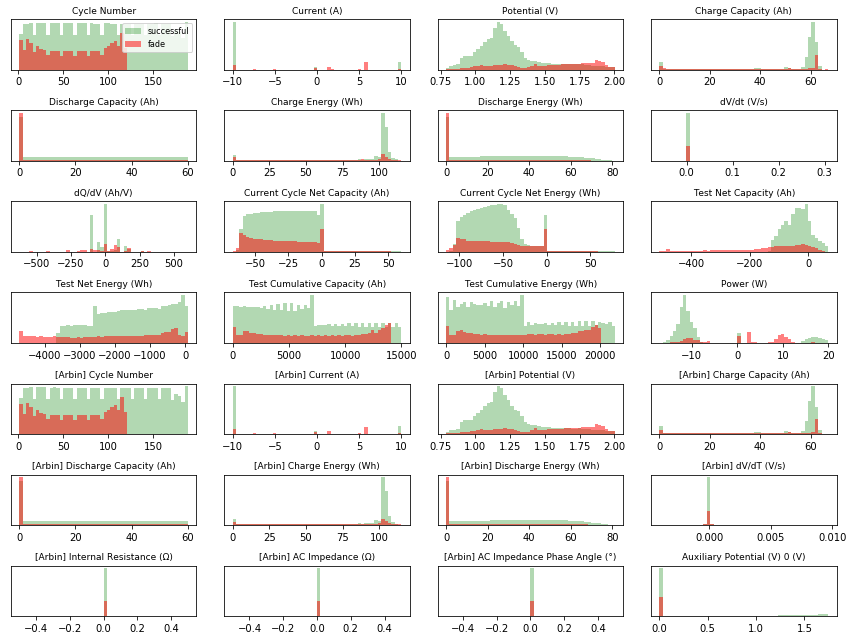

In [11]:
fig, axes = plt.subplots(7, 4, figsize = (12, 9))

ax = axes.ravel() # flat axes with numpy ravel

# bin_range = int(scaled_df.iloc[:, :].max().max() - scaled_df.iloc[:, :].min().min()) + 1

for i in range(28):
    _, bins = np.histogram(imputed_df.iloc[:, i], bins = 50)
    ax[i].hist(imputed_df.iloc[:481649, i], color = 'g', bins = bins, alpha = 0.3)
    ax[i].hist(imputed_df.iloc[481650:, i], color = 'r', bins = bins, alpha = 0.5)
    ax[i].set_title(imputed_df.columns.values[i], fontsize = 9)
    ax[i].axes.get_xaxis().set_visible(True) # these values are not useful for the data vis
    ax[i].set_yticks(())
    
ax[0].legend(['successful', 'fade'], loc = 'best', fontsize = 8)
plt.tight_layout()
plt.show()